<a href="https://colab.research.google.com/github/Mrinal19/Machine-Learning-Algorithms/blob/main/K_Fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_data.csv to all_data (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_data (1).csv')
df

,1,2,3,4,5,6,7,8,9,10,...,528,529,530,531,532,533,534,535,536,Target
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906,0
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574,0
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574,0
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451,0
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-0.000978,-0.001481,-0.002011,-0.001986,-0.001594,-0.001217,-0.000997,-0.000547,0.000031,0.000534,...,0.84507,3.0606,3.8405,1.3064,1.80800,0.72727,0.81104,2.5046,2.73800,1
226,-0.001599,-0.001084,0.000465,0.002076,0.002883,0.003667,0.004457,0.005221,0.005871,0.006257,...,0.84004,2.8913,3.7049,1.2511,1.41830,0.64878,0.82323,2.3979,2.35770,1
227,-0.000511,-0.001370,-0.002769,-0.003582,-0.003714,-0.003721,-0.003621,-0.003399,-0.003106,-0.002629,...,0.82726,3.2587,3.5905,1.2684,1.56390,0.66174,0.83218,2.4844,2.33220,1
228,-0.000880,-0.001734,-0.003095,-0.003891,-0.004015,-0.003949,-0.003827,-0.003839,-0.003775,-0.003182,...,0.84793,2.9933,3.9598,1.3825,1.59220,0.76657,0.80723,2.5448,2.67160,1


In [ ]:
df1 = df.iloc[:, :-1]
df1

,1,2,3,4,5,6,7,8,9,10,...,527,528,529,530,531,532,533,534,535,536
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.77763,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.79771,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.79716,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.82714,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.87298,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-0.000978,-0.001481,-0.002011,-0.001986,-0.001594,-0.001217,-0.000997,-0.000547,0.000031,0.000534,...,0.77637,0.84507,3.0606,3.8405,1.3064,1.80800,0.72727,0.81104,2.5046,2.73800
226,-0.001599,-0.001084,0.000465,0.002076,0.002883,0.003667,0.004457,0.005221,0.005871,0.006257,...,0.72555,0.84004,2.8913,3.7049,1.2511,1.41830,0.64878,0.82323,2.3979,2.35770
227,-0.000511,-0.001370,-0.002769,-0.003582,-0.003714,-0.003721,-0.003621,-0.003399,-0.003106,-0.002629,...,0.81189,0.82726,3.2587,3.5905,1.2684,1.56390,0.66174,0.83218,2.4844,2.33220
228,-0.000880,-0.001734,-0.003095,-0.003891,-0.004015,-0.003949,-0.003827,-0.003839,-0.003775,-0.003182,...,0.73051,0.84793,2.9933,3.9598,1.3825,1.59220,0.76657,0.80723,2.5448,2.67160


In [ ]:
#Removing last column
df1 = df.iloc[: , :-1]
df1

,1,2,3,4,5,6,7,8,9,10,...,527,528,529,530,531,532,533,534,535,536
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.77763,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.79771,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.79716,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.82714,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.87298,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-0.000978,-0.001481,-0.002011,-0.001986,-0.001594,-0.001217,-0.000997,-0.000547,0.000031,0.000534,...,0.77637,0.84507,3.0606,3.8405,1.3064,1.80800,0.72727,0.81104,2.5046,2.73800
226,-0.001599,-0.001084,0.000465,0.002076,0.002883,0.003667,0.004457,0.005221,0.005871,0.006257,...,0.72555,0.84004,2.8913,3.7049,1.2511,1.41830,0.64878,0.82323,2.3979,2.35770
227,-0.000511,-0.001370,-0.002769,-0.003582,-0.003714,-0.003721,-0.003621,-0.003399,-0.003106,-0.002629,...,0.81189,0.82726,3.2587,3.5905,1.2684,1.56390,0.66174,0.83218,2.4844,2.33220
228,-0.000880,-0.001734,-0.003095,-0.003891,-0.004015,-0.003949,-0.003827,-0.003839,-0.003775,-0.003182,...,0.73051,0.84793,2.9933,3.9598,1.3825,1.59220,0.76657,0.80723,2.5448,2.67160


In [ ]:
skewValues = df1.skew(axis = 1)
print(skewValues)
df2['skew'] = skewValues
df2

0      12.244585
1      12.542175
2      13.122395
3      12.706307
4      13.195501
         ...    
225     9.857453
226    10.084521
227     9.937893
228    10.028346
229    10.084521
Length: 230, dtype: float64


In [ ]:
import statistics
from scipy.special import entr
from scipy.stats import skew
max = []
min = []
avg = []
s = []

#Traversing dataframe
for i in range(230):
  max.append(df.iloc[i].max())
  min.append(df.iloc[i].min())
  avg.append(statistics.mean(df.iloc[i, :-1]))
  s.append(skew(df.iloc[i, :-1]))

In [ ]:
# Creating a dataframe to store all variables

data = {'Max' : max, 'Min' : min, 'Mean' : avg, 'Skewness' : s, 'Target' : df['Target'] }
df2 = pd.DataFrame(data)
df2

,Max,Min,Mean,Skewness,Target
0,3.7557,-0.026893,0.025111,12.210292,0
1,3.9877,-0.021074,0.025813,12.507048,0
2,3.9749,-0.029054,0.024400,13.085644,0
3,3.9205,-0.021758,0.025106,12.670720,0
4,3.7667,-0.022622,0.024145,13.158544,0
...,...,...,...,...,...
225,3.8405,-0.010830,0.034311,9.829845,1
226,3.7049,-0.004494,0.031896,10.056277,1
227,3.5905,-0.003721,0.032878,9.910060,1
228,3.9598,-0.006268,0.034118,10.000260,1


In [ ]:
x = df2.iloc[:,:-1]
y = df2['Target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

print(xtrain[0:10, :])

[[ 0.18628563  0.36796959  0.08693222 -0.23969845]
 [ 0.88727915 -2.11729394 -0.97829513  1.35964639]
 [ 0.07247892  0.71840125  0.63669319 -0.62882904]
 [-0.68122875  0.16140645 -0.23276264 -0.43548011]
 [ 1.18366535 -1.20533835 -1.4925731   2.25085704]
 [-2.48258659  0.30028294  0.30038835 -1.11960555]
 [ 0.36188311 -1.13352294 -1.79837151  2.3659679 ]
 [-1.10329108  0.2990318  -0.01987824 -0.8358917 ]
 [ 0.33046408  0.22183649 -0.4500356   0.28801647]
 [-2.11219111  0.26212318  0.16056294 -0.8828131 ]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, multi_class='multinomial', solver='lbfgs')
classifier.fit(xtrain, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
y_pred = classifier.predict(xtest)
len(y_pred)

58

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[26  0]
 [ 2 30]]


** K -Fold Cross Validation **

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9655172413793104


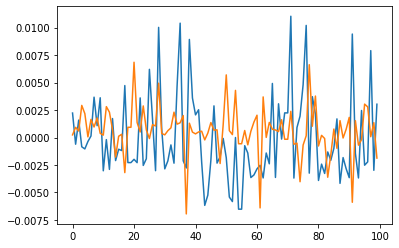

In [ ]:
# Plotting Signal

a=df.iloc[:100, 5]
b=df.iloc[:100, 215]
c=[]

for i in range(100):
  c.append(i)
plt.plot(c,a)
plt.plot(c, b)